In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from sklearn.manifold import TSNE
pd.set_option('display.max_columns', None)

In [2]:
df_data = pd.read_csv('../data/sale_data/2_sale_enriched.csv')
df_data.head(2)

,citta,bagni,stanze,piano,regione,m2,quartiere,via,disponibilità,prezzo,delta_pubblicazione,totale_piani,ascensore,cucina,camere,tipologia_casa,classe_casa,tipologia_proprietà,n posti auto,box privato,balcone,impianto tv singolo,porta blindata,parzialmente arredato,cantina,esposizione doppia,arredato,caminetto,terrazza,impianto di allarme,portiere,piscina_idromassaggio,videocitofono,cancello elettrico,fibra ottica,armadio a muro,impianto tv centralizzato,mansarda,giardino,infissi,house_id,popolazione,reddito mediano,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,emb_10,emb_11,emb_12,emb_13,emb_14,emb_15,emb_16,emb_17,emb_18,emb_19,emb_20,emb_21,emb_22,emb_23,emb_24,emb_25,emb_26,emb_27,emb_28,emb_29,emb_30,emb_31,emb_32,emb_33,emb_34,emb_35,emb_36,emb_37,emb_38,emb_39,emb_40,emb_41,emb_42,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49,emb_50,emb_51,emb_52,emb_53,emb_54,emb_55,emb_56,emb_57,emb_58,emb_59,emb_60,emb_61,emb_62,emb_63,emb_64,emb_65,emb_66,emb_67,emb_68,emb_69,emb_70,emb_71,emb_72,emb_73,emb_74,emb_75,emb_76,emb_77,emb_78,emb_79,emb_80,emb_81,emb_82,emb_83,emb_84,emb_85,emb_86,emb_87,emb_88,emb_89,emb_90,emb_91,emb_92,emb_93,emb_94,emb_95,emb_96,emb_97,emb_98,emb_99,emb_100,emb_101,emb_102,emb_103,emb_104,emb_105,emb_106,emb_107,emb_108,emb_109,emb_110,emb_111,emb_112,emb_113,emb_114,emb_115,emb_116,emb_117,emb_118,emb_119,emb_120,emb_121,emb_122,emb_123,emb_124,emb_125,emb_126,emb_127,emb_128,emb_129,emb_130,emb_131,emb_132,emb_133,emb_134,emb_135,emb_136,emb_137,emb_138,emb_139,emb_140,emb_141,emb_142,emb_143,emb_144,emb_145,emb_146,emb_147,emb_148,emb_149,emb_150,emb_151,emb_152,emb_153,emb_154,emb_155,emb_156,emb_157,emb_158,emb_159,emb_160,emb_161,emb_162,emb_163,emb_164,emb_165,emb_166,emb_167,emb_168,emb_169,emb_170,emb_171,emb_172,emb_173,emb_174,emb_175,emb_176,emb_177,emb_178,emb_179,emb_180,emb_181,emb_182,emb_183,emb_184,emb_185,emb_186,emb_187,emb_188,emb_189,emb_190,emb_191,emb_192,emb_193,emb_194,emb_195,emb_196,emb_197,emb_198,emb_199,emb_200,emb_201,emb_202,emb_203,emb_204,emb_205,emb_206,emb_207,emb_208,emb_209,emb_210,emb_211,emb_212,emb_213,emb_214,emb_215,emb_216,emb_217,emb_218,emb_219,emb_220,emb_221,emb_222,emb_223,emb_224,emb_225,emb_226,emb_227,emb_228,emb_229,emb_230,emb_231,emb_232,emb_233,emb_234,emb_235,emb_236,emb_237,emb_238,emb_239,emb_240,emb_241,emb_242,emb_243,emb_244,emb_245,emb_246,emb_247,emb_248,emb_249,emb_250,emb_251,emb_252,emb_253,emb_254,emb_255,log_prezzo,log_m2
0,rosignano marittimo,1,quadrilocale,1,toscana,100,Piazza Pietro Gori,missing,Libero,123000.0,0,2,0,cucina abitabile,2,Appartamento,Classe immobile media,Intera proprietà,0,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,missing,doppio,house_0,30072.0,36766,-13.905892,-11.643143,4.674152,-1.949362,0.430578,0.625568,-0.888460,0.857836,4.963647,-2.406258,-6.772042,-0.880467,0.679862,-2.296174,1.235494,0.752634,6.70654,2.281140,2.699341,3.529126,7.815059,-1.327780,0.308076,0.284575,3.514744,0.852945,1.008327,0.492062,4.202331,-0.032557,-0.024874,-0.496773,0.140628,-2.417908,2.286416,0.234867,4.050361,0.784794,2.912140,-0.476989,1.864718,2.558327,-2.093573,-0.527219,-2.424078,-1.046245,-1.063726,0.339301,0.107854,-0.866554,-0.914478,-1.137980,-2.745634,0.777524,2.937662,-0.457012,0.002664,-0.200885,2.490539,-0.218074,-2.999933,-1.292991,-1.774387,3.908987,-0.693932,-0.823033,2.591804,-0.36490,0.395605,-1.210860,2.288550,-0.272188,-2.111028,-1.274609,-0.195762,1.137376,-3.056793,-0.376937,1.382887,2.564094,-0.351382,-1.998026,-0.056663,-1.837333,1.275820,-0.643936,-1.151584,-0.380151,-1.345704,1.418021,2.547430,-4.819973,-1.006639,-2.296907,-0.627297,0.583431,1.495637,0.540836,-1.436298,-1.351212,0.050674,0.687792,1.006436,-2.336013,-0.611336,-0.919186,-0.043527,0.591394,-1.697503,-0.256435,0.624653,2.649301,0.588888,0.404112,-2.025281,-0.248422,-0.912779,-0.510598,0.370676,-1.108351,-2.026085,0.541074,-0.628000,-0.459164,0.479951,1.570752,-0

In [3]:
categoricals = ['bagni', 'stanze', 'piano', 'disponibilità', 
                'ascensore', 'cucina',
                'classe_casa', 'tipologia_proprietà', 'box privato',
                'balcone', 'impianto tv singolo', 'porta blindata',
                'parzialmente arredato', 'cantina', 'esposizione doppia', 'arredato',
                'caminetto', 'terrazza', 'impianto di allarme', 'portiere',
                'piscina_idromassaggio', 'videocitofono', 'cancello elettrico',
                'fibra ottica', 'armadio a muro', 'impianto tv centralizzato',
                'mansarda', 'giardino', 'infissi']

In [4]:
def plot_by_level(categorical_var, df, ax, var_to_plot='prezzo', cmap='Dark2'):
    n_categories = df[categorical_var].nunique()
    categories = df[categorical_var].unique()
    cmap=mpl.colormaps[cmap]
    colors=cmap(np.linspace(0, 1, n_categories))
    for idx in range(n_categories):
        cat = categories[idx]
        ax.hist(df[df[categorical_var]==cat][var_to_plot], bins=50, color=colors[idx], label=cat, alpha=0.7, density=True)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

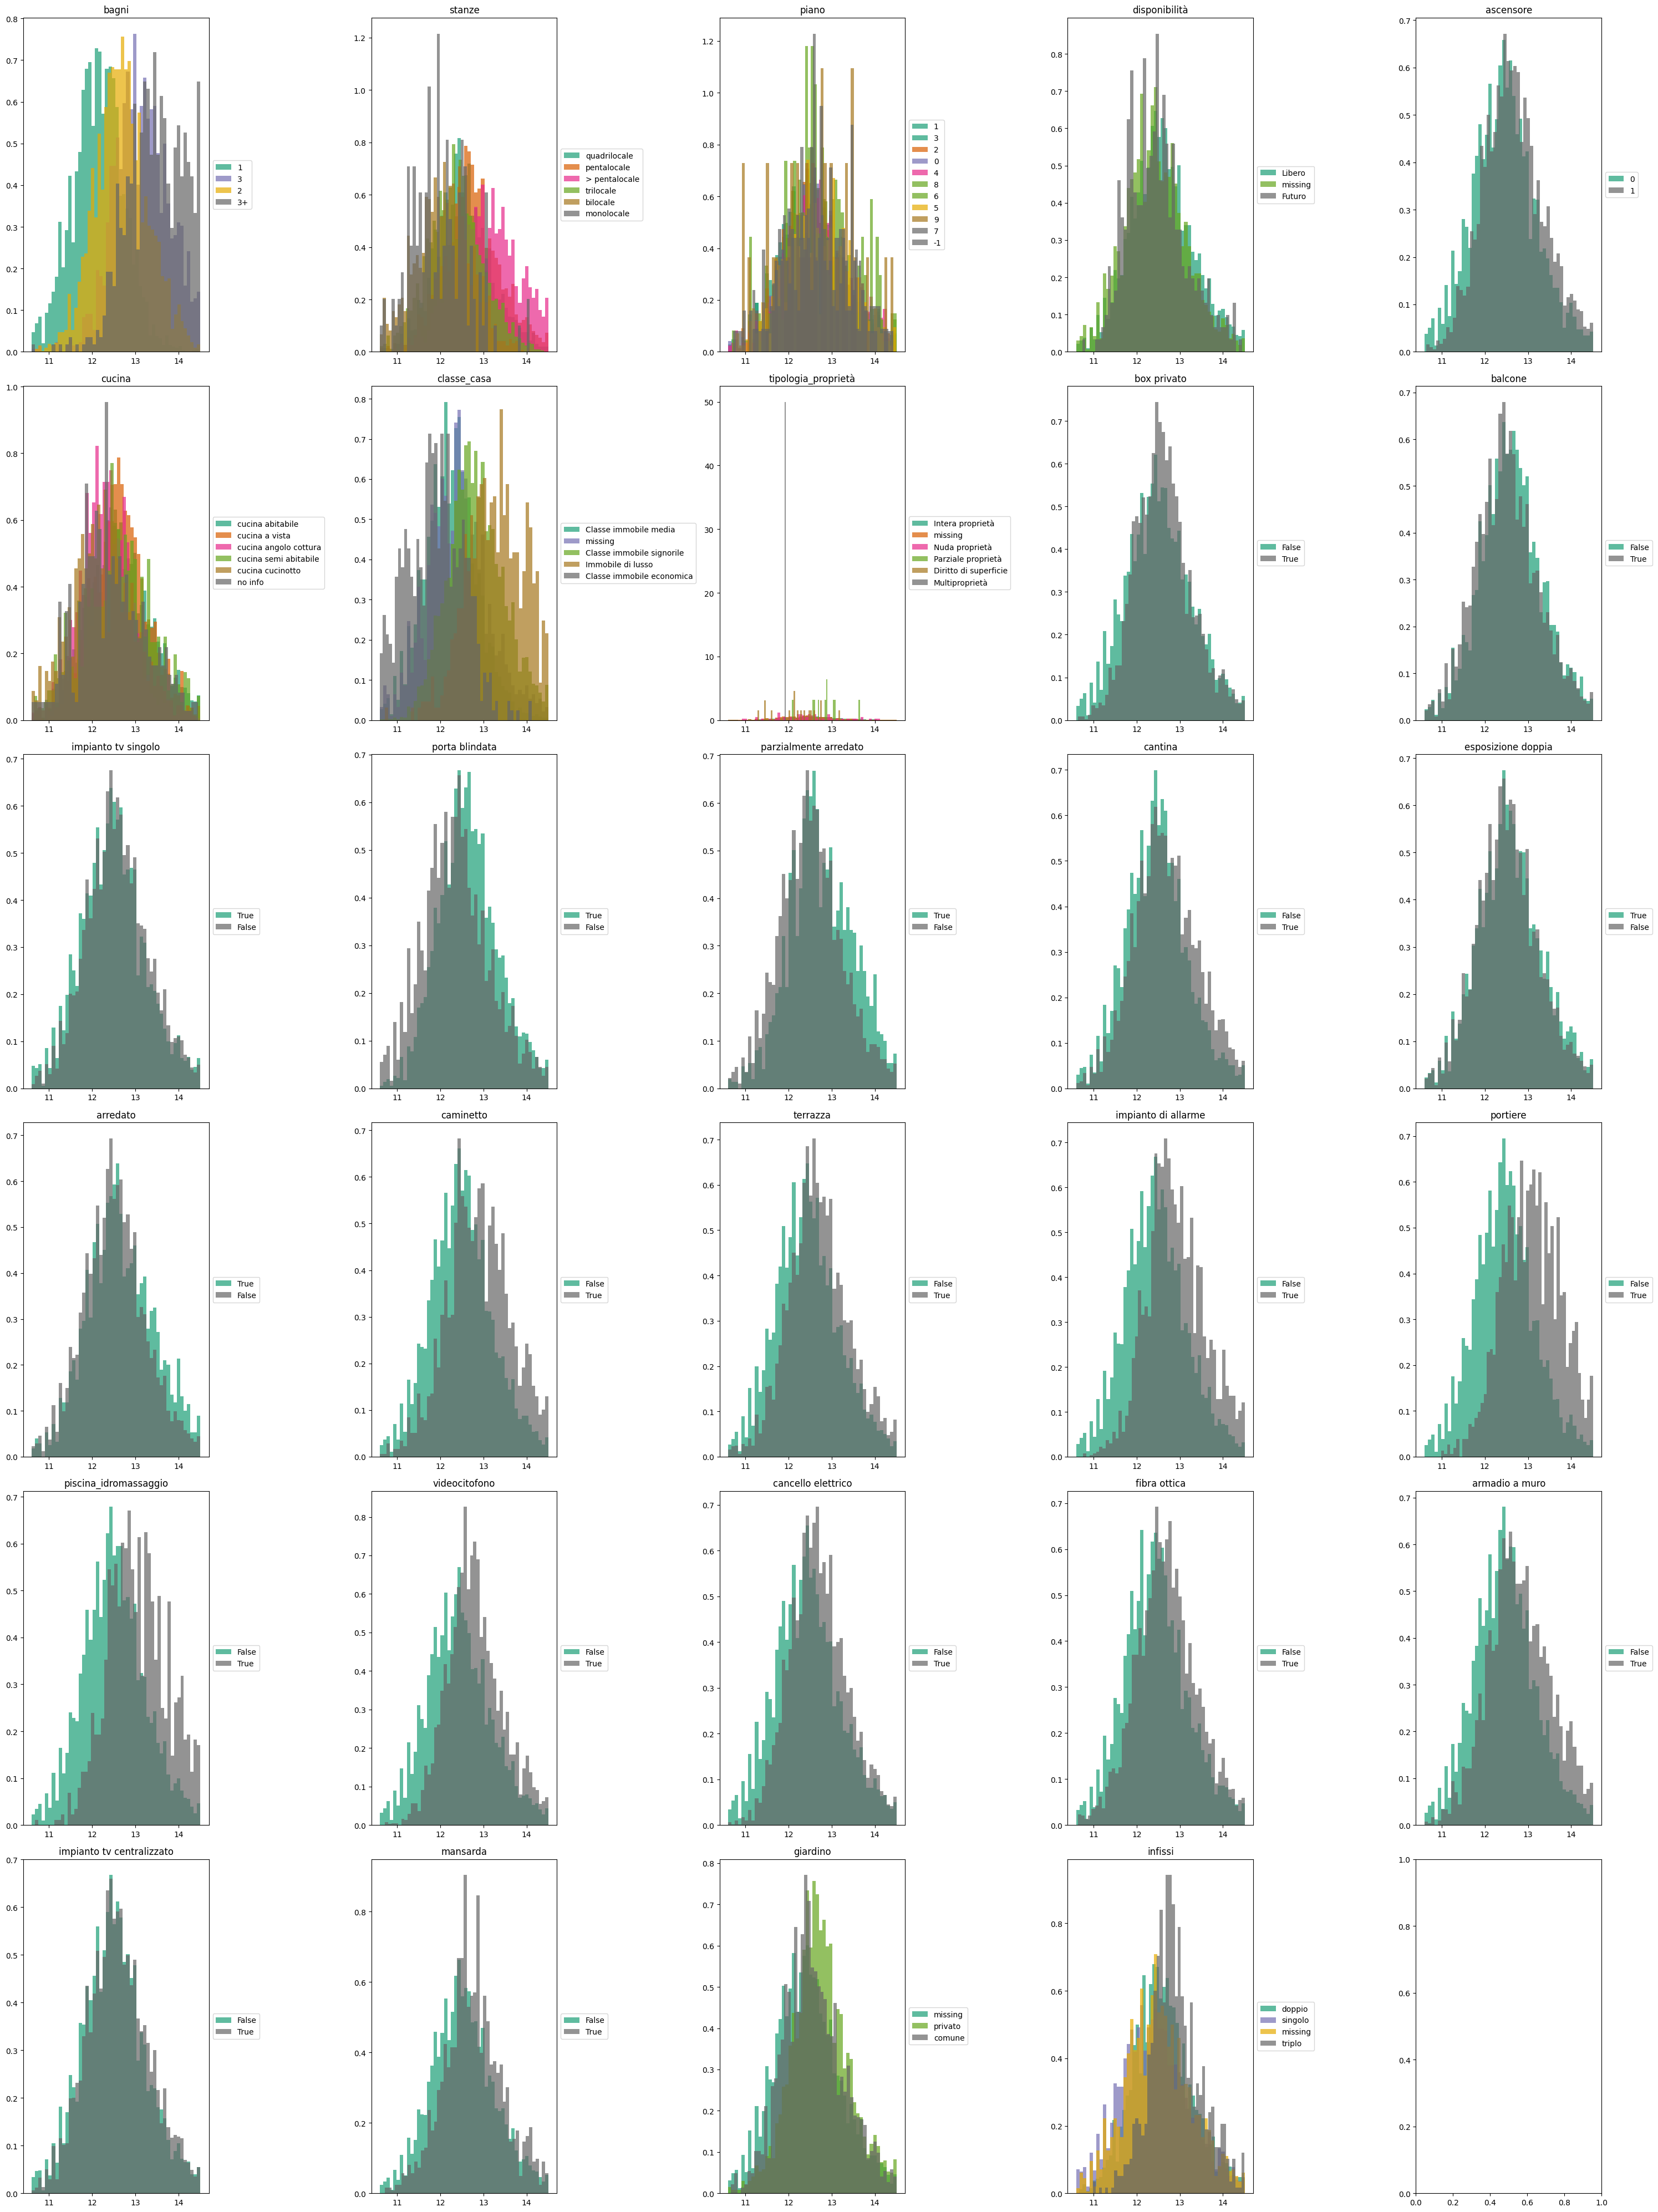

In [5]:
fig, axs = plt.subplots(ncols=5, nrows=6, figsize=(30,40))
axs=axs.ravel()
for i in range(len(categoricals)):
    ax=axs[i]
    ax.set_title(categoricals[i])
    plot_by_level(categoricals[i], df_data, ax=ax, var_to_plot='log_prezzo')
plt.tight_layout()

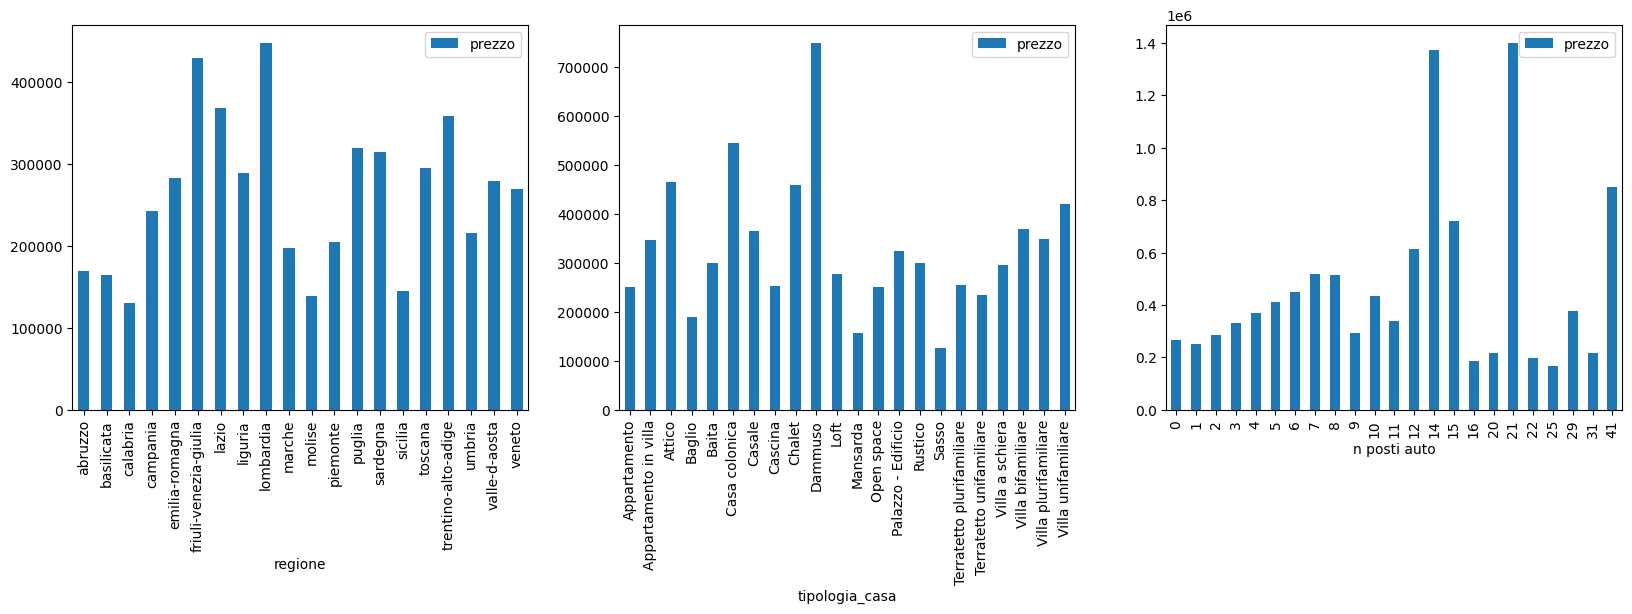

In [6]:
bar_cols = ['regione', 'tipologia_casa', 'n posti auto']
fig, axs = plt.subplots(ncols=3, figsize=(20,5))
axs=axs.ravel()
for i in range(len(bar_cols)):
    ax=axs[i]
    df_data.groupby(bar_cols[i])[['prezzo']].median().plot.bar(ax=ax)
plt.show()

In [7]:
embedding_cols = [i for i in df_data.columns if 'emb_' in i]
embedded = TSNE(n_components=2, learning_rate='auto', init='random', random_state=42).fit_transform(df_data[embedding_cols])

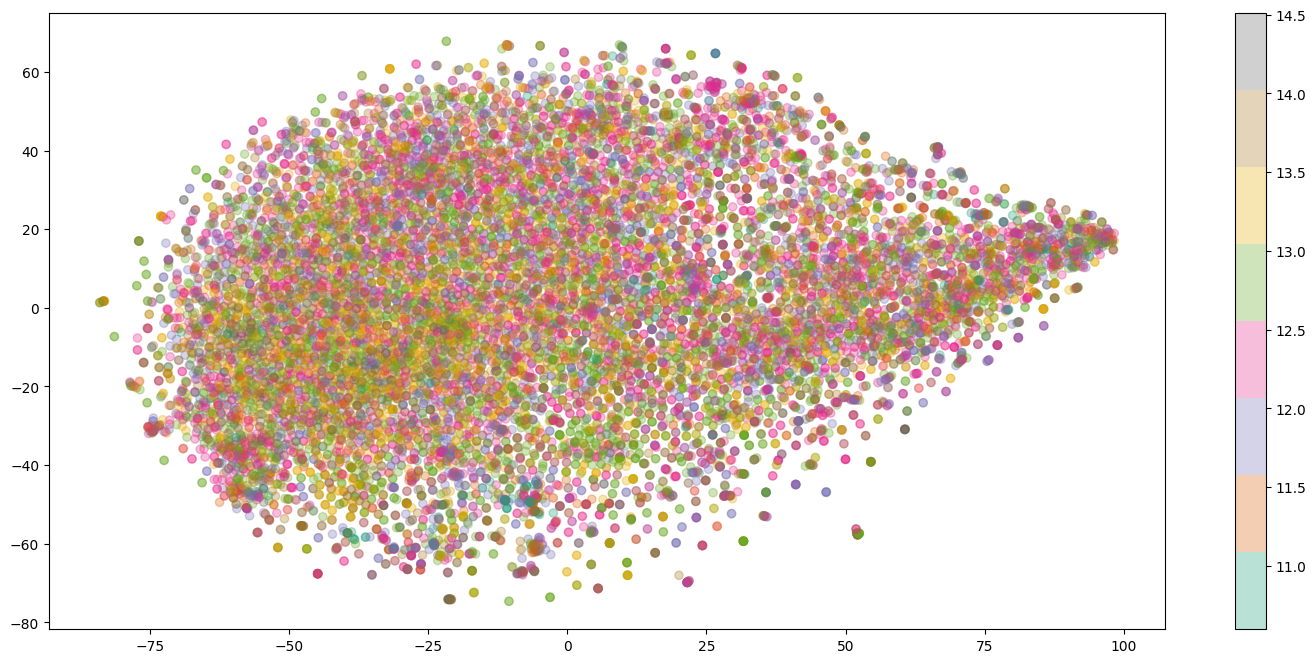

In [8]:
embedded_df = pd.DataFrame({'x': embedded[:,0], 'y':embedded[:,1],'price':df_data['log_prezzo']})
fig, ax = plt.subplots(figsize=(18,8))
cmap=mpl.colormaps['Dark2']
sc = ax.scatter(embedded_df['x'], embedded_df['y'], c=embedded_df['price'], cmap=cmap, alpha=0.3)
plt.colorbar(sc)
plt.show()